# Linear Regression - Project Exercise

We have just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 


## Imports
** Importing all the necessary libraries to carry forward the analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True
from sklearn.model_selection import train_test_split
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers=pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's get some basic insight from the data!**

**Looking at the correlation between the Tiem on Website and the Yearly Amount Spent**

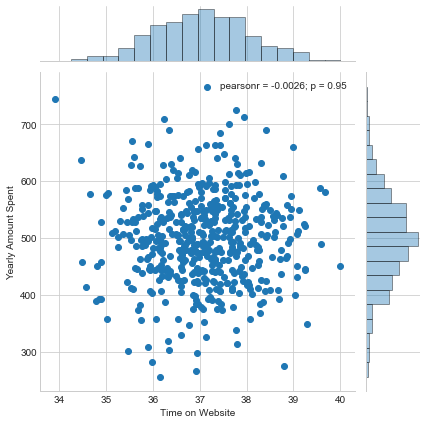

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

** Looking at the same plot for Time on App **

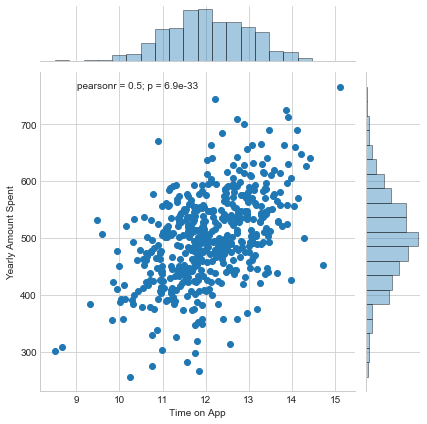

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

** We can look at the correlation of all the parameters at once using the pairplot in seaborn **

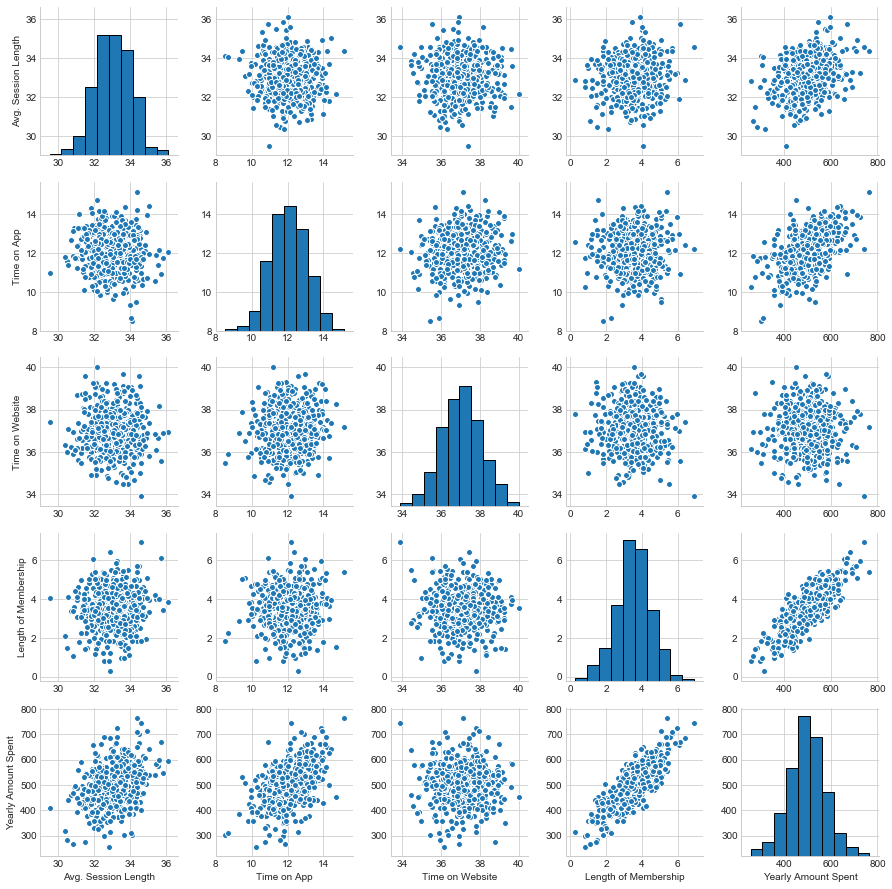

In [8]:
sns.pairplot(data = customers)

**Based off this plot it looks like The Length of Membership is the most correlated feature with Yearly Amount Spent**

**To check this, we will create a linear model plot of  Yearly Amount Spent vs. Length of Membership. **

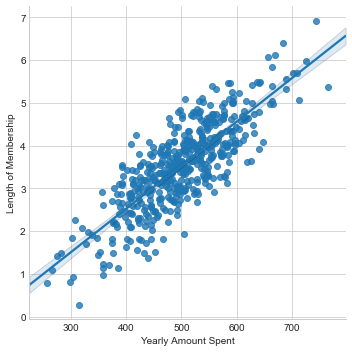

In [9]:
sns.lmplot(x='Yearly Amount Spent', y = 'Length of Membership' , data=customers)

It is quite clear now that the Yearly Amount Spent is correlated to the Length of the Membership. The Time on App seems to be more correlated to Yearly Amount Spent than the Time on Website. We would now like to look at this further using Linear Regression

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** The parameter of intereest is the "Yearly Amount Spent" column which would be our *y* series. The other numerical variables in our initial dataset would be the new dataset *X* **

In [10]:
X=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [11]:
y=customers['Yearly Amount Spent']

** We would be supplying 30% of the data to our test set and using the remaing 70% to create the predictive model**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now that the test and train datasets have been established, the training sets can be used to created a linear presiction of what the output value would be. We can then compare that against the actual output value.


In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [14]:
prediction = lm.predict(X_test)

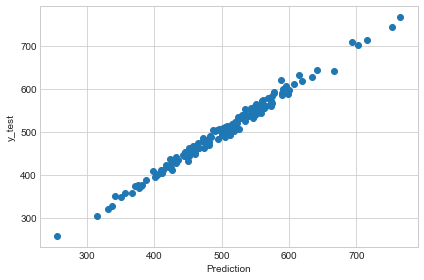

In [15]:
plt.scatter(prediction, y_test)
plt.xlabel("Prediction")
plt.ylabel("y_test")
plt.tight_layout()

It looks like the prediction is a good fit to the actual test data at hand. In order to further fortify the confidence in the model, we look at the errors and the distribution of the residuals.

## Evaluating the Model

We can evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

We already see that the model we have is a good fit. But to confirm it further, we can look at the distribution of the residuals. The residuals are the difference between the test data set and the predicted datset. If the residuals are normally distributed around 0, then the model is considered to be a good fit. 


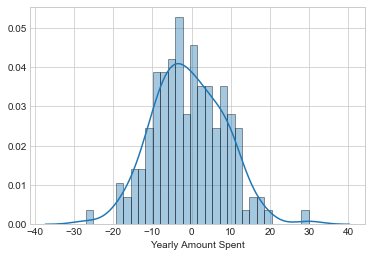

In [17]:
sns.distplot((y_test-prediction),bins = 30)

**Both a low error and a normally distributed set of residuals confirm goodness of the model's fit**

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Creating a dataframe for the coefficients. **

In [18]:
coeff = pd.DataFrame(lm.coef_, index = X.columns)
coeff.columns = ['Coefficient']
coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

The values in the set above can be interpreted as:  Keeping all other indices constant, the coefficient dictates the linear increase the index when a unit increase in *'y'* is seen 

**Do you think the company should focus more on their mobile app or on their website?**

Coming back to the inital question at hand, it looks like the Yearly Amount Spent is most dependent on the Length of the Membership. Apart from this, the other parameter affecting the Yearly Amount Spent, would be the Time on App, and so, the company should focus more on their mobile app.